<img src="https://certificate.tpq.io/taim_logo.png" width="350px" align="right">

# Artificial Intelligence in Finance

## Recurrent Neural Networks

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

## First Example

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from pprint import pprint
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
#pd.set_option('precision', 4)
np.set_printoptions(suppress=True, precision=4)
os.environ['PYTHONHASHSEED'] = '0'

C:\Users\adria\AppData\Local\Temp\ipykernel_10948\1632325378.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
set_seeds()

In [5]:
a = np.arange(100)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [6]:
a = a.reshape((len(a), -1))

In [7]:
a

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [8]:
a.shape

(100, 1)

In [9]:
a[:5]

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [10]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [11]:
lags = 3

In [12]:
g = TimeseriesGenerator(a, a, length=lags, batch_size=5)

In [13]:
g

In [14]:
pprint(list(g)[0])

(array([[[0],
        [1],
        [2]],

       [[1],
        [2],
        [3]],

       [[2],
        [3],
        [4]],

       [[3],
        [4],
        [5]],

       [[4],
        [5],
        [6]]]),
 array([[3],
       [4],
       [5],
       [6],
       [7]]))


In [15]:
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense

In [16]:
model = Sequential()
model.add(SimpleRNN(100, activation='relu',
                    input_shape=(lags, 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adagrad', loss='mse',
              metrics=['mae'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 100)               10200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [18]:
%%time
model.fit(g, epochs=1000, steps_per_epoch=5,
            verbose=False)

CPU times: total: 1min 50s
Wall time: 1min 28s


In [19]:
res = pd.DataFrame(model.history.history)

In [20]:
res.tail(3)

,loss,mae
997,1.159415,0.978617
998,1.327364,1.000324
999,0.308312,0.521992


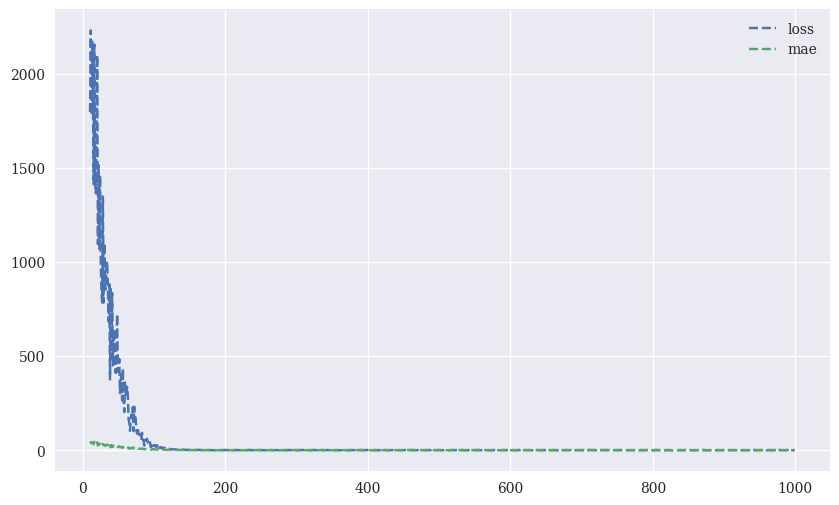

In [21]:
res.iloc[10:].plot(figsize=(10, 6), style=['--', '--']);

In [22]:
x = np.array([21, 22, 23]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

23

In [23]:
x

array([[[21],
        [22],
        [23]]])

In [24]:
y

array([[22.7307]], dtype=float32)

In [25]:
x = np.array([87, 88, 89]).reshape((1, lags, 1))
y = model.predict(x, verbose=0)
int(round(y[0, 0]))

91

In [26]:
x = np.array([187, 188, 189]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

193

In [27]:
x = np.array([1187, 1188, 1189]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

1220

## Second Example

In [28]:
def transform(x):
    y = 0.05 * x ** 2 + 0.2 * x + np.sin(x) + 5
    y += np.random.standard_normal(len(x)) * 0.2
    return y

In [29]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
a = transform(x)

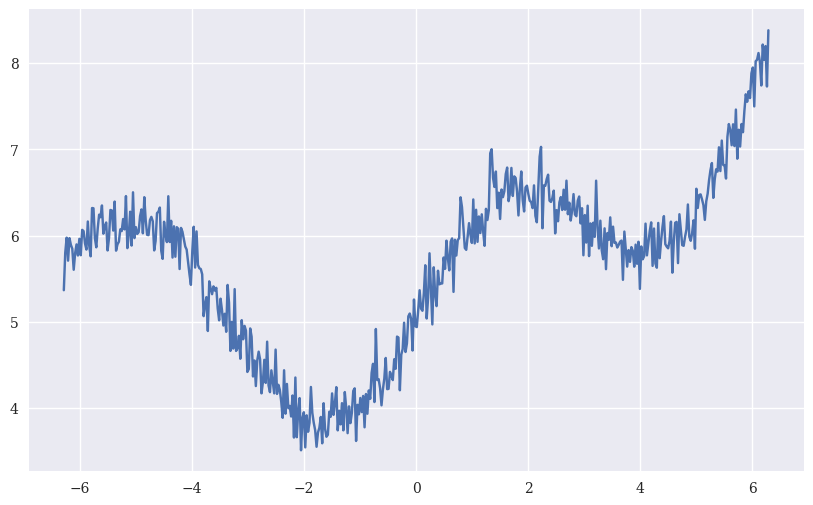

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(x, a);

In [31]:
a = a.reshape((len(a), -1))

In [32]:
a[:5]

array([[5.3673],
       [5.8002],
       [5.9768],
       [5.7102],
       [5.9715]])

In [33]:
lags = 5

In [34]:
g = TimeseriesGenerator(a, a, length=lags, batch_size=5)

In [35]:
model = Sequential()
model.add(SimpleRNN(500, activation='relu', input_shape=(lags, 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 500)               251000    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 501       
Total params: 251,501
Trainable params: 251,501
Non-trainable params: 0
_________________________________________________________________


In [37]:
%%time
model.fit(g, epochs=500,
          steps_per_epoch=10,
          verbose=False)

CPU times: total: 2min 17s
Wall time: 1min 39s


In [38]:
x = np.linspace(-6 * np.pi, 6 * np.pi, 1000)
d = transform(x)

In [39]:
g_ = TimeseriesGenerator(d, d, length=lags, batch_size=len(d))

In [40]:
f = list(g_)[0][0].reshape((len(d) - lags, lags, 1))

In [41]:
y = model.predict(f, verbose=False)

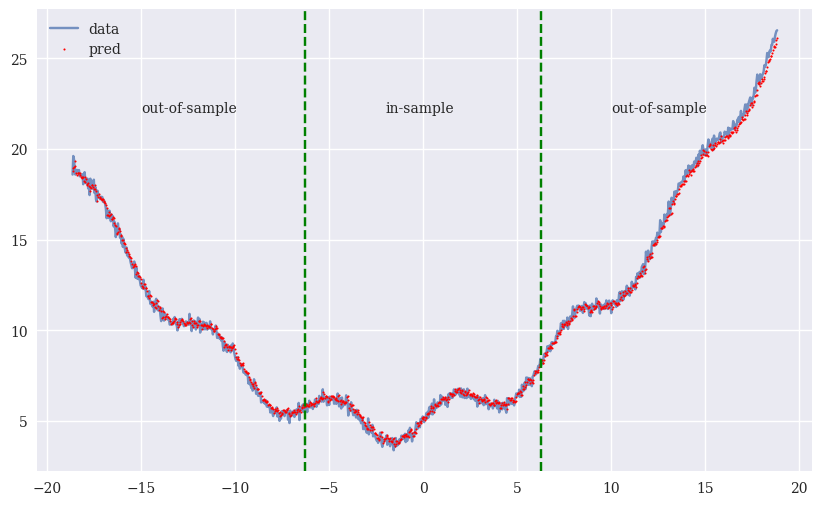

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(x[lags:], d[lags:], label='data', alpha=0.75)
plt.plot(x[lags:], y, 'r.', label='pred', ms=3)
plt.axvline(-2 * np.pi, c='g', ls='--')
plt.axvline(2 * np.pi, c='g', ls='--')
plt.text(-15, 22, 'out-of-sample')
plt.text(-2, 22, 'in-sample')
plt.text(10, 22, 'out-of-sample')
plt.legend();

## Financial Price Series

In [43]:
url2 = 'http://hilpisch.com/aiif_eikon_id_eur_usd.csv'

In [51]:
path = r'C:\Users\adria\1Python\Meu_novo_projeto\WIN_N_1K\WIN_N_1k.csv'

In [ ]:
symbol2 = 'EUR_USD'

In [52]:
symbol = 'WIN_N'

In [53]:
raw = pd.read_csv(path, index_col=0, parse_dates=True)

In [54]:
raw

,open,high,low,close,tick_volume,real_volume
time,,,,,,
2022-01-18 11:38:00,106635.0,106725.0,106610.0,106705.0,17263,64315
2022-01-18 11:39:00,106710.0,106825.0,106665.0,106785.0,25017,90996
2022-01-18 11:40:00,106780.0,106860.0,106675.0,106685.0,30803,110379
2022-01-18 11:41:00,106690.0,106910.0,106665.0,106885.0,30323,112419
2022-01-18 11:42:00,106880.0,106965.0,106800.0,106955.0,22614,80706
...,...,...,...,...,...,...
2022-10-13 16:55:00,114915.0,114920.0,114915.0,114915.0,38,275
2022-10-13 16:56:00,114920.0,114920.0,114915.0,114920.0,56,240
2022-10-13 16:57:00,114920.0,114920.0,114915.0,114920.0,42,200


In [55]:
def generate_data():
    data = pd.DataFrame(raw['close'])
    data.columns = [symbol]
    return data

In [56]:
data = generate_data()

In [57]:
data

,WIN_N
time,
2022-01-18 11:38:00,106705.0
2022-01-18 11:39:00,106785.0
2022-01-18 11:40:00,106685.0
2022-01-18 11:41:00,106885.0
2022-01-18 11:42:00,106955.0
...,...
2022-10-13 16:55:00,114915.0
2022-10-13 16:56:00,114920.0
2022-10-13 16:57:00,114920.0


In [58]:
data = (data - data.mean()) / data.std()

In [59]:
data

,WIN_N
time,
2022-01-18 11:38:00,-0.634018
2022-01-18 11:39:00,-0.620362
2022-01-18 11:40:00,-0.637432
2022-01-18 11:41:00,-0.603291
2022-01-18 11:42:00,-0.591342
...,...
2022-10-13 16:55:00,0.767454
2022-10-13 16:56:00,0.768307
2022-10-13 16:57:00,0.768307


In [60]:
p = data[symbol].values

In [61]:
p

array([-0.634 , -0.6204, -0.6374, ...,  0.7683,  0.7675,  0.7666])

In [62]:
p = p.reshape((len(p), -1))

In [63]:
p

array([[-0.634 ],
       [-0.6204],
       [-0.6374],
       ...,
       [ 0.7683],
       [ 0.7675],
       [ 0.7666]])

In [64]:
lags = 5

In [65]:
g = TimeseriesGenerator(p, p, length=lags, batch_size=5)

In [66]:
def create_rnn_model(hu=100, lags=lags, layer='SimpleRNN',
                           features=1, algorithm='estimation'):
    model = Sequential()
    if layer == 'SimpleRNN':
        model.add(SimpleRNN(hu, activation='relu',
                            input_shape=(lags, features)))
    else:
        model.add(LSTM(hu, activation='relu',
                       input_shape=(lags, features)))
    if algorithm == 'estimation':
        model.add(Dense(1, activation='linear'))
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    else:
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy',
                      metrics=['accuracy'])
    return model

In [67]:
model = create_rnn_model()

In [68]:
%%time
model.fit(g, epochs=500, steps_per_epoch=10, verbose=False)

Epoch 1/500
10/10 [==============================] - 2s 19ms/step - loss: 2.1413 - mae: 1.3555
Epoch 2/500
10/10 [==============================] - 0s 16ms/step - loss: 0.4386 - mae: 0.5558
Epoch 3/500
10/10 [==============================] - 0s 19ms/step - loss: 0.2901 - mae: 0.4295
Epoch 4/500
10/10 [==============================] - 0s 18ms/step - loss: 0.1582 - mae: 0.2412
Epoch 5/500
10/10 [==============================] - 0s 17ms/step - loss: 0.0156 - mae: 0.1112
Epoch 6/500
10/10 [==============================] - 0s 17ms/step - loss: 0.0051 - mae: 0.0510
Epoch 7/500
10/10 [==============================] - 0s 17ms/step - loss: 0.0010 - mae: 0.0251
Epoch 8/500
10/10 [==============================] - 0s 16ms/step - loss: 0.0116 - mae: 0.0749
Epoch 9/500
10/10 [==============================] - 0s 16ms/step - loss: 0.0050 - mae: 0.0525
Epoch 10/500
10/10 [==============================] - 0s 18ms/step - loss: 7.7522e-04 - mae: 0.0212
Epoch 11/500
10/10 [=========================

10/10 [==============================] - 0s 19ms/step - loss: 3.5966e-04 - mae: 0.0136
Epoch 84/500
10/10 [==============================] - 0s 21ms/step - loss: 3.8811e-04 - mae: 0.0159
Epoch 85/500
10/10 [==============================] - 0s 19ms/step - loss: 2.6386e-04 - mae: 0.0111
Epoch 86/500
10/10 [==============================] - 0s 22ms/step - loss: 3.8882e-04 - mae: 0.0155
Epoch 87/500
10/10 [==============================] - 0s 21ms/step - loss: 1.4811e-04 - mae: 0.0095
Epoch 88/500
10/10 [==============================] - 0s 21ms/step - loss: 1.1764e-04 - mae: 0.0086
Epoch 89/500
10/10 [==============================] - 0s 17ms/step - loss: 2.8310e-04 - mae: 0.0150
Epoch 90/500
10/10 [==============================] - 0s 19ms/step - loss: 2.9015e-04 - mae: 0.0134
Epoch 91/500
10/10 [==============================] - 0s 18ms/step - loss: 1.5981e-04 - mae: 0.0099
Epoch 92/500
10/10 [==============================] - 0s 19ms/step - loss: 8.6814e-04 - mae: 0.0225
Epoch 93/500


10/10 [==============================] - 0s 17ms/step - loss: 5.0405e-04 - mae: 0.0164
Epoch 166/500
10/10 [==============================] - 0s 16ms/step - loss: 2.4428e-04 - mae: 0.0118
Epoch 167/500
10/10 [==============================] - 0s 18ms/step - loss: 3.0921e-04 - mae: 0.0110
Epoch 168/500
10/10 [==============================] - 0s 17ms/step - loss: 8.1042e-05 - mae: 0.0070
Epoch 169/500
10/10 [==============================] - 0s 17ms/step - loss: 2.0909e-04 - mae: 0.0117
Epoch 170/500
10/10 [==============================] - 0s 18ms/step - loss: 1.7368e-04 - mae: 0.0095
Epoch 171/500
10/10 [==============================] - 0s 16ms/step - loss: 2.7084e-04 - mae: 0.0122
Epoch 172/500
10/10 [==============================] - 0s 18ms/step - loss: 5.0721e-04 - mae: 0.0150
Epoch 173/500
10/10 [==============================] - 0s 15ms/step - loss: 3.7812e-04 - mae: 0.0160
Epoch 174/500
10/10 [==============================] - 0s 15ms/step - loss: 6.0846e-04 - mae: 0.0196
Epoc

10/10 [==============================] - 0s 18ms/step - loss: 1.2623e-04 - mae: 0.0090
Epoch 248/500
10/10 [==============================] - 0s 18ms/step - loss: 1.3651e-04 - mae: 0.0096
Epoch 249/500
10/10 [==============================] - 0s 20ms/step - loss: 2.0544e-04 - mae: 0.0116
Epoch 250/500
10/10 [==============================] - 0s 22ms/step - loss: 1.7931e-04 - mae: 0.0111
Epoch 251/500
10/10 [==============================] - 0s 18ms/step - loss: 3.0893e-04 - mae: 0.0150
Epoch 252/500
10/10 [==============================] - 0s 18ms/step - loss: 1.0704e-04 - mae: 0.0081
Epoch 253/500
10/10 [==============================] - 0s 18ms/step - loss: 1.3072e-04 - mae: 0.0097
Epoch 254/500
10/10 [==============================] - 0s 19ms/step - loss: 2.2564e-04 - mae: 0.0120
Epoch 255/500
10/10 [==============================] - 0s 17ms/step - loss: 3.4142e-04 - mae: 0.0128
Epoch 256/500
10/10 [==============================] - 0s 19ms/step - loss: 2.1234e-04 - mae: 0.0108
Epoc

10/10 [==============================] - 0s 20ms/step - loss: 2.0383e-04 - mae: 0.0107
Epoch 329/500
10/10 [==============================] - 0s 19ms/step - loss: 9.2530e-05 - mae: 0.0067
Epoch 330/500
10/10 [==============================] - 0s 18ms/step - loss: 1.2178e-04 - mae: 0.0086
Epoch 331/500
10/10 [==============================] - 0s 18ms/step - loss: 2.2386e-04 - mae: 0.0120
Epoch 332/500
10/10 [==============================] - 0s 19ms/step - loss: 2.2058e-04 - mae: 0.0117
Epoch 333/500
10/10 [==============================] - 0s 18ms/step - loss: 2.6583e-04 - mae: 0.0127
Epoch 334/500
10/10 [==============================] - 0s 19ms/step - loss: 2.3992e-04 - mae: 0.0120
Epoch 335/500
10/10 [==============================] - 0s 17ms/step - loss: 6.1011e-04 - mae: 0.0156
Epoch 336/500
10/10 [==============================] - 0s 19ms/step - loss: 0.0026 - mae: 0.0246
Epoch 337/500
10/10 [==============================] - 0s 22ms/step - loss: 2.0859e-04 - mae: 0.0124
Epoch 33

10/10 [==============================] - 0s 18ms/step - loss: 0.0063 - mae: 0.0411
Epoch 411/500
10/10 [==============================] - 0s 19ms/step - loss: 0.0298 - mae: 0.0782
Epoch 412/500
10/10 [==============================] - 0s 17ms/step - loss: 4.1553e-04 - mae: 0.0164
Epoch 413/500
10/10 [==============================] - 0s 26ms/step - loss: 0.0235 - mae: 0.0845
Epoch 414/500
10/10 [==============================] - 0s 18ms/step - loss: 0.0843 - mae: 0.1378
Epoch 415/500
10/10 [==============================] - 0s 17ms/step - loss: 0.0025 - mae: 0.0388
Epoch 416/500
10/10 [==============================] - 0s 19ms/step - loss: 0.0250 - mae: 0.1040
Epoch 417/500
10/10 [==============================] - 0s 16ms/step - loss: 0.0028 - mae: 0.0336
Epoch 418/500
10/10 [==============================] - 0s 18ms/step - loss: 0.0090 - mae: 0.0538
Epoch 419/500
10/10 [==============================] - 0s 18ms/step - loss: 1.9962e-04 - mae: 0.0115
Epoch 420/500
10/10 [===============

10/10 [==============================] - 0s 17ms/step - loss: 2.6430e-04 - mae: 0.0130
Epoch 493/500
10/10 [==============================] - 0s 18ms/step - loss: 5.5574e-04 - mae: 0.0199
Epoch 494/500
10/10 [==============================] - 0s 17ms/step - loss: 4.7780e-04 - mae: 0.0182
Epoch 495/500
10/10 [==============================] - 0s 20ms/step - loss: 5.3606e-04 - mae: 0.0167
Epoch 496/500
10/10 [==============================] - 0s 18ms/step - loss: 2.7925e-04 - mae: 0.0134
Epoch 497/500
10/10 [==============================] - 0s 17ms/step - loss: 1.2581e-04 - mae: 0.0088
Epoch 498/500
10/10 [==============================] - 0s 19ms/step - loss: 1.5239e-04 - mae: 0.0098
Epoch 499/500
10/10 [==============================] - 0s 18ms/step - loss: 1.6545e-04 - mae: 0.0094
Epoch 500/500
10/10 [==============================] - 0s 19ms/step - loss: 2.6028e-04 - mae: 0.0123
CPU times: total: 2min 14s
Wall time: 2min 9s


In [69]:
y = model.predict(g, verbose=False)

In [70]:
data['pred'] = np.nan
data['pred'].iloc[lags:] = y.flatten()

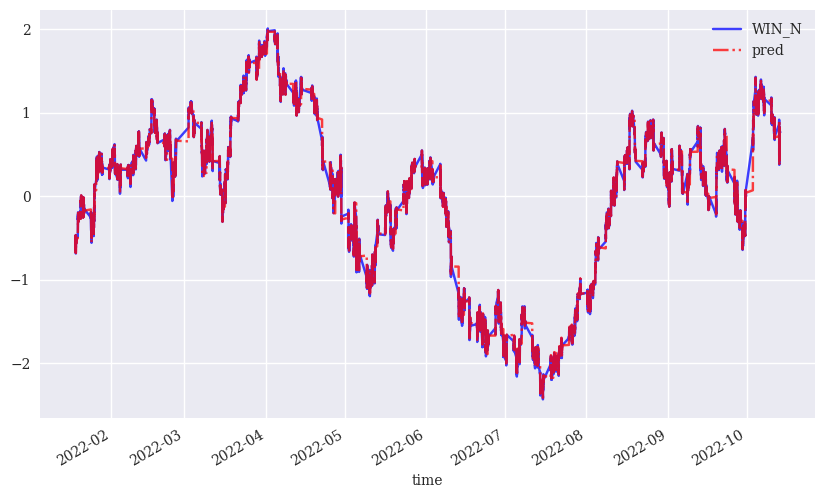

In [71]:
data[[symbol, 'pred']].plot(
            figsize=(10, 6), style=['b', 'r-.'],
            alpha=0.75);

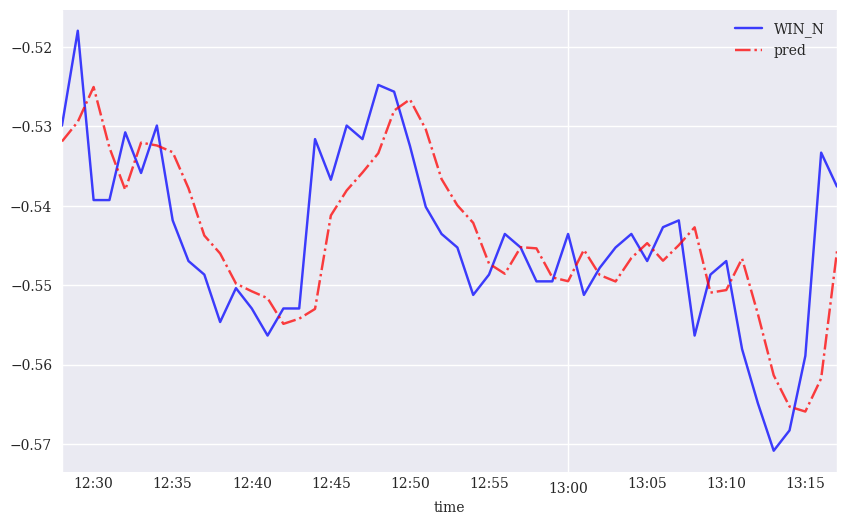

In [72]:
data[[symbol, 'pred']].iloc[50:100].plot(
            figsize=(10, 6), style=['b', 'r-.'],
            alpha=0.75);

## Financial Return Series 

In [73]:
data = generate_data()

In [74]:
data

,WIN_N
time,
2022-01-18 11:38:00,106705.0
2022-01-18 11:39:00,106785.0
2022-01-18 11:40:00,106685.0
2022-01-18 11:41:00,106885.0
2022-01-18 11:42:00,106955.0
...,...
2022-10-13 16:55:00,114915.0
2022-10-13 16:56:00,114920.0
2022-10-13 16:57:00,114920.0


In [75]:
data['r'] = np.log(data / data.shift(1))

In [77]:
data

,WIN_N,r
time,,
2022-01-18 11:39:00,106785.0,0.000749
2022-01-18 11:40:00,106685.0,-0.000937
2022-01-18 11:41:00,106885.0,0.001873
2022-01-18 11:42:00,106955.0,0.000655
2022-01-18 11:43:00,107135.0,0.001682
...,...,...
2022-10-13 16:55:00,114915.0,-0.000044
2022-10-13 16:56:00,114920.0,0.000044
2022-10-13 16:57:00,114920.0,0.000000


In [78]:
data.dropna(inplace=True)

In [79]:
data

,WIN_N,r
time,,
2022-01-18 11:39:00,106785.0,0.000749
2022-01-18 11:40:00,106685.0,-0.000937
2022-01-18 11:41:00,106885.0,0.001873
2022-01-18 11:42:00,106955.0,0.000655
2022-01-18 11:43:00,107135.0,0.001682
...,...,...
2022-10-13 16:55:00,114915.0,-0.000044
2022-10-13 16:56:00,114920.0,0.000044
2022-10-13 16:57:00,114920.0,0.000000


In [80]:
data = (data - data.mean()) / data.std()

In [81]:
data

,WIN_N,r
time,,
2022-01-18 11:39:00,-0.620366,1.269051
2022-01-18 11:40:00,-0.637436,-1.589288
2022-01-18 11:41:00,-0.603296,3.173323
2022-01-18 11:42:00,-0.591347,1.108444
2022-01-18 11:43:00,-0.560620,2.848925
...,...,...
2022-10-13 16:55:00,0.767445,-0.075004
2022-10-13 16:56:00,0.768299,0.072492
2022-10-13 16:57:00,0.768299,-0.001256


In [82]:
r = data['r'].values

In [83]:
r = r.reshape((len(r), -1))

In [84]:
r

array([[ 1.2691],
       [-1.5893],
       [ 3.1733],
       ...,
       [-0.0013],
       [-0.075 ],
       [-0.075 ]])

In [85]:
g = TimeseriesGenerator(r, r, length=lags, batch_size=5)

In [86]:
list(g)[0]

(array([[[ 1.2691],
         [-1.5893],
         [ 3.1733],
         [ 1.1084],
         [ 2.8489]],
 
        [[-1.5893],
         [ 3.1733],
         [ 1.1084],
         [ 2.8489],
         [ 0.0778]],
 
        [[ 3.1733],
         [ 1.1084],
         [ 2.8489],
         [ 0.0778],
         [-1.5049]],
 
        [[ 1.1084],
         [ 2.8489],
         [ 0.0778],
         [-1.5049],
         [-1.4269]],
 
        [[ 2.8489],
         [ 0.0778],
         [-1.5049],
         [-1.4269],
         [ 0.2364]]]),
 array([[ 0.0778],
        [-1.5049],
        [-1.4269],
        [ 0.2364],
        [-2.0624]]))

In [87]:
model = create_rnn_model()

In [88]:
%%time
model.fit(g, epochs=500, steps_per_epoch=10,
          verbose=False)

CPU times: total: 2min 2s
Wall time: 1min 38s


In [89]:
y = model.predict(g, verbose=False)

In [90]:
data['pred'] = np.nan
data['pred'].iloc[lags:] = y.flatten()
data.dropna(inplace=True)

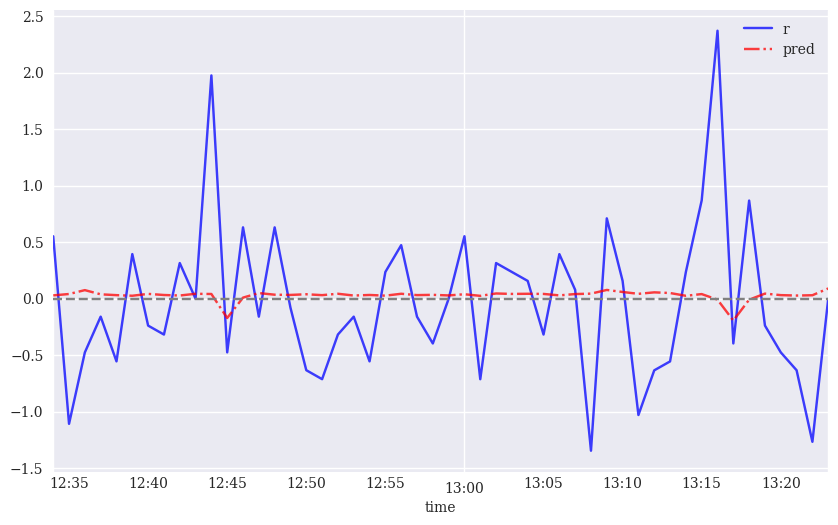

In [91]:
data[['r', 'pred']].iloc[50:100].plot(
            figsize=(10, 6), style=['b', 'r-.'],
            alpha=0.75);
plt.axhline(0, c='grey', ls='--');

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
accuracy_score(np.sign(data['r']), np.sign(data['pred']))

0.4818237276609363

In [94]:
split = int(len(r) * 0.8)

In [95]:
train = r[:split]

In [97]:
test = r[split:]

In [98]:
g = TimeseriesGenerator(train, train, length=lags, batch_size=5)

In [99]:
set_seeds()
model = create_rnn_model(hu=100)

In [100]:
%%time
model.fit(g, epochs=100, steps_per_epoch=10, verbose=False)

CPU times: total: 25 s
Wall time: 19.3 s


In [101]:
g_ = TimeseriesGenerator(test, test, length=lags, batch_size=5)

In [102]:
y = model.predict(g_)

In [103]:
accuracy_score(np.sign(test[lags:]), np.sign(y))

0.5049262315578895

## Financial Features

In [104]:
data = generate_data()

In [105]:
data['r'] = np.log(data / data.shift(1))

In [106]:
data

,WIN_N,r
time,,
2022-01-18 11:38:00,106705.0,NaN
2022-01-18 11:39:00,106785.0,0.000749
2022-01-18 11:40:00,106685.0,-0.000937
2022-01-18 11:41:00,106885.0,0.001873
2022-01-18 11:42:00,106955.0,0.000655
...,...,...
2022-10-13 16:55:00,114915.0,-0.000044
2022-10-13 16:56:00,114920.0,0.000044
2022-10-13 16:57:00,114920.0,0.000000


In [107]:
window = 20
data['mom'] = data['r'].rolling(window).mean()
data['vol'] = data['r'].rolling(window).std()

In [109]:
data.tail()

,WIN_N,r,mom,vol
time,,,,
2022-10-13 16:55:00,114915.0,-0.000044,0.000013,0.000051
2022-10-13 16:56:00,114920.0,0.000044,0.000011,0.000049
2022-10-13 16:57:00,114920.0,0.000000,0.000013,0.000047
2022-10-13 16:58:00,114915.0,-0.000044,0.000007,0.000045
2022-10-13 16:59:00,114910.0,-0.000044,0.000004,0.000047


In [110]:
data.dropna(inplace=True)

### Estimation

In [111]:
split = int(len(data) * 0.8)

In [112]:
train = data.iloc[:split].copy()

In [113]:
mu, std = train.mean(), train.std()

In [114]:
train

,WIN_N,r,mom,vol
time,,,,
2022-01-18 11:58:00,106945.0,0.000468,0.000112,0.000846
2022-01-18 11:59:00,106980.0,0.000327,0.000091,0.000834
2022-01-18 12:00:00,106995.0,0.000140,0.000145,0.000798
2022-01-18 12:01:00,106950.0,-0.000421,0.000030,0.000695
2022-01-18 12:02:00,106975.0,0.000234,0.000009,0.000681
...,...,...,...,...
2022-08-19 11:57:00,113640.0,-0.000044,-0.000004,0.000545
2022-08-19 11:58:00,113585.0,-0.000484,-0.000053,0.000542
2022-08-19 11:59:00,113630.0,0.000396,-0.000002,0.000534


In [115]:
train = (train - mu) / std

In [116]:
train

,WIN_N,r,mom,vol
time,,,,
2022-01-18 11:58:00,-0.449799,0.816276,0.892396,1.161218
2022-01-18 11:59:00,-0.444208,0.570766,0.723536,1.124954
2022-01-18 12:00:00,-0.441811,0.243795,1.154294,1.012329
2022-01-18 12:01:00,-0.449000,-0.736821,0.237034,0.688300
2022-01-18 12:02:00,-0.445006,0.407309,0.068680,0.645412
...,...,...,...,...
2022-08-19 11:57:00,0.619698,-0.078258,-0.041287,0.216462
2022-08-19 11:58:00,0.610912,-0.847726,-0.428383,0.208086
2022-08-19 11:59:00,0.618101,0.691200,-0.023694,0.182492


In [117]:
test = data.iloc[split:].copy()

In [118]:
test = (test - mu) / std

In [119]:
g = TimeseriesGenerator(train.values, train['r'].values,
                        length=lags, batch_size=5)

In [120]:
set_seeds()
model = create_rnn_model(hu=100, features=len(data.columns),
                         layer='SimpleRNN')

In [121]:
%%time
model.fit(g, epochs=100, steps_per_epoch=10,
                verbose=0)

Epoch 1/100
10/10 - 1s - loss: 0.5182 - mae: 0.5371
Epoch 2/100
10/10 - 0s - loss: 1.6462 - mae: 0.6336
Epoch 3/100
10/10 - 0s - loss: 1.1935 - mae: 0.7691
Epoch 4/100
10/10 - 0s - loss: 0.5295 - mae: 0.5730
Epoch 5/100
10/10 - 0s - loss: 0.5977 - mae: 0.5200
Epoch 6/100
10/10 - 0s - loss: 1.1593 - mae: 0.7460
Epoch 7/100
10/10 - 0s - loss: 0.9003 - mae: 0.7537
Epoch 8/100
10/10 - 0s - loss: 0.4827 - mae: 0.5168
Epoch 9/100
10/10 - 0s - loss: 0.5594 - mae: 0.5569
Epoch 10/100
10/10 - 0s - loss: 0.4742 - mae: 0.5117
Epoch 11/100
10/10 - 0s - loss: 0.6829 - mae: 0.6183
Epoch 12/100
10/10 - 0s - loss: 0.8089 - mae: 0.6351
Epoch 13/100
10/10 - 0s - loss: 0.5758 - mae: 0.5758
Epoch 14/100
10/10 - 0s - loss: 0.7417 - mae: 0.6399
Epoch 15/100
10/10 - 0s - loss: 0.6546 - mae: 0.6029
Epoch 16/100
10/10 - 0s - loss: 1.1973 - mae: 0.7643
Epoch 17/100
10/10 - 0s - loss: 0.6450 - mae: 0.6217
Epoch 18/100
10/10 - 0s - loss: 0.5888 - mae: 0.6152
Epoch 19/100
10/10 - 0s - loss: 1.3379 - mae: 0.8140
Ep

In [122]:
g_ = TimeseriesGenerator(test.values, test['r'].values,
                         length=lags, batch_size=5)

In [123]:
y = model.predict(g_).flatten()

In [124]:
accuracy_score(np.sign(test['r'].iloc[lags:]), np.sign(y))

0.49427242259016557

### Classification

In [125]:
set_seeds()
model = create_rnn_model(hu=50,
            features=len(data.columns),
            layer='LSTM',
            algorithm='classification')

In [126]:
train_y = np.where(train['r'] > 0, 1, 0)

In [127]:
np.bincount(train_y)

array([41868, 38115], dtype=int64)

In [128]:
def cw(a):
    c0, c1 = np.bincount(a)
    w0 = (1 / c0) * (len(a)) / 2
    w1 = (1 / c1) * (len(a)) / 2
    return {0: w0, 1: w1}

In [129]:
g = TimeseriesGenerator(train.values, train_y,
                        length=lags, batch_size=5)

In [130]:
%%time
model.fit(g, epochs=5, steps_per_epoch=10,
          verbose=False, class_weight=cw(train_y))

CPU times: total: 4.06 s
Wall time: 3.09 s


In [131]:
test_y = np.where(test['r'] > 0, 1, 0)

In [132]:
g_ = TimeseriesGenerator(test.values, test_y,
                         length=lags, batch_size=5)

In [133]:
y = np.where(model.predict(g_, batch_size=None) > 0.5,
             1, 0).flatten()

In [134]:
np.bincount(y)

array([19251,   740], dtype=int64)

In [135]:
accuracy_score(test_y[lags:], y)

0.5231354109349207

### Deep RNNs

In [136]:
from keras.layers import Dropout

In [137]:
def create_deep_rnn_model(hl=2, hu=100, layer='SimpleRNN',
                          optimizer='rmsprop', features=1,
                          dropout=False, rate=0.3, seed=100):
    if hl <= 2: hl = 2
    if layer == 'SimpleRNN':
        layer = SimpleRNN
    else:
        layer = LSTM
    model = Sequential()
    model.add(layer(hu, input_shape=(lags, features),
                     return_sequences=True,
                    ))
    if dropout:
        model.add(Dropout(rate, seed=seed))
    for _ in range(2, hl):
        model.add(layer(hu, return_sequences=True))
        if dropout:
            model.add(Dropout(rate, seed=seed))
    model.add(layer(hu))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [144]:
set_seeds()
model = create_deep_rnn_model(
            hl=2, hu=50, layer='LSTM',
            features=len(data.columns),
            dropout=True, rate=0.3)

In [145]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 50)             11000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 31,251
Trainable params: 31,251
Non-trainable params: 0
_________________________________________________________________


In [146]:
%%time
model.fit(g, epochs=200, steps_per_epoch=10,
          verbose=False, class_weight=cw(train_y))

CPU times: total: 50.5 s
Wall time: 47.2 s


In [147]:
%%time
y = np.where(model.predict(g_, batch_size=None) > 0.5,
             1, 0).flatten()

CPU times: total: 19.5 s
Wall time: 15.5 s


In [148]:
np.bincount(y)

array([ 8611, 11380], dtype=int64)

In [149]:
accuracy_score(test_y[lags:], y)

0.5020259116602471

In [150]:
list(g)[0]

(array([[[-0.4498,  0.8163,  0.8924,  1.1612],
         [-0.4442,  0.5708,  0.7235,  1.125 ],
         [-0.4418,  0.2438,  1.1543,  1.0123],
         [-0.449 , -0.7368,  0.237 ,  0.6883],
         [-0.445 ,  0.4073,  0.0687,  0.6454]],
 
        [[-0.4442,  0.5708,  0.7235,  1.125 ],
         [-0.4418,  0.2438,  1.1543,  1.0123],
         [-0.449 , -0.7368,  0.237 ,  0.6883],
         [-0.445 ,  0.4073,  0.0687,  0.6454],
         [-0.4378,  0.734 , -0.4356,  0.2873]],
 
        [[-0.4418,  0.2438,  1.1543,  1.0123],
         [-0.449 , -0.7368,  0.237 ,  0.6883],
         [-0.445 ,  0.4073,  0.0687,  0.6454],
         [-0.4378,  0.734 , -0.4356,  0.2873],
         [-0.4426, -0.4915, -0.5664,  0.2925]],
 
        [[-0.449 , -0.7368,  0.237 ,  0.6883],
         [-0.445 ,  0.4073,  0.0687,  0.6454],
         [-0.4378,  0.734 , -0.4356,  0.2873],
         [-0.4426, -0.4915, -0.5664,  0.2925],
         [-0.4418,  0.0804, -0.1929,  0.1882]],
 
        [[-0.445 ,  0.4073,  0.0687,  0.6454],
 

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

<br><br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:ai@tpq.io">ai@tpq.io</a>